In [139]:
import numpy as np
import pandas as pd
from ipywidgets import *
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import glob

fold = 'test/test_out/'
job_dict = {'osc':'000000000000', 'mu=1': '000000000001', 'mu=30000': '000000030000'}
jobNumber = job_dict['osc']

endFiles = [fold+jobNumber+'neutronend.out']
spinFiles = [fold+jobNumber+'neutronspin.out']
snapFiles = [fold+jobNumber+'neutronsnapshot.out']


In [140]:
df_end_list = (pd.read_csv(endFile, sep=' ') for endFile in endFiles)
df_end = pd.concat(df_end_list, ignore_index=True)
df_end['particle'] = df_end['particle'] + 200*df_end['jobnumber']
# df_end.head()
# df_end.columns

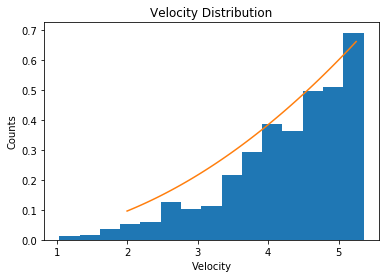

In [155]:
df_end['vmag'] = (df_end['vxstart']**2+df_end['vystart']**2+df_end['vzstart']**2)**.5

fig, ax = plt.subplots()

ax.hist(df_end['vmag'],bins=15, density=True)

ax.set_title('Velocity Distribution')
ax.set_xlabel('Velocity')
ax.set_ylabel('Counts')

x = np.linspace(2,5.25,num=100)
y = (3/125) * x**2

ax.plot(x,y)

plt.show()

# print(df_end.vxstart)



In [142]:
df_end_stored = df_end[df_end.stopID==-1]
print(len(df_end))
# df_end_stored.head()
# df_end_stored.Szstart
# print(df_end_stored[['xstart','ystart','zstart']])

1000


In [143]:
df_spin_list = (pd.read_csv(spinFile, sep=' ') for spinFile in spinFiles)
df_spin = pd.concat(df_spin_list, ignore_index=True)
df_spin['particle'] = df_spin['particle'] + 200*df_spin['jobnumber']

df_spin['Bmag']=(df_spin.Bx**2+df_spin.By**2+df_spin.Bz**2)**.5
# df_spin.head()
# df_spin[df_spin.t==0][['Bx','By','Bz']]

In [144]:
# df_spin_1 = df_spin[df_spin.particle==3]
# df_spin_1 = df_spin[df_spin.particle.isin(df_end_stored.particle)]

# # polarization = [np.dot(df_spin_1[['Sx','Sy','Sz']].iloc[i],df_spin_1[['Bx','By','Bz']].iloc[i])/np.linalg.norm(df_spin_1[['Bx','By','Bz']].iloc[i]) for i in range(len(df_spin_1))] 

# fig, ax = plt.subplots(1)

# ax.plot(df_spin_1['t'],df_spin_1['Sz'], 'k+', markersize=3)
# ax.ticklabel_format(style='sci',useOffset=False)

# ax[1].plot(df_spin_1['t'],df_spin_1['Bz']/df_spin_1['Bmag'],'ko',markersize=2)

In [145]:
df_snap_list = (pd.read_csv(snapFile, sep=' ') for snapFile in snapFiles)
df_snap = pd.concat(df_snap_list, ignore_index=True)
df_snap['particle'] = df_snap['particle'] + 200*df_snap['jobnumber']

# df_snap.columns
# df_snap.tail()[['particle','xend','yend','zend','polend','Bend']]

0.0 0.0 0.0


Text(0, 0.5, 'Average Spin')

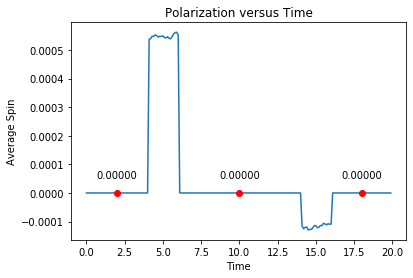

In [146]:
df_snap = df_snap[df_snap.particle.isin(df_end_stored.particle)]
snapTimes = df_snap['tend'].unique()
snapPol = np.array([df_snap[df_snap['tend'] == tUni]['Szend'].mean() for tUni in snapTimes])

half_index = int(len(snapPol)/2)
print(snapPol[0], snapPol[half_index], snapPol[-1])

fig, ax = plt.subplots()

ax.plot(snapTimes,snapPol)
index_list = [int(half_index/5),half_index,-int(half_index/5)]

for i in index_list:
    ax.plot(snapTimes[i],snapPol[i],'ro')
    
    ax.annotate('{:.5f}'.format(snapPol[i]*100),
        (snapTimes[i],snapPol[i]),
        textcoords = 'offset points',
        ha = 'center',
        xytext = (0,15)
    )

# ax.ticklabel_format(style='sci',useOffset=False)
ax.set_title('Polarization versus Time')
ax.set_xlabel('Time')
ax.set_ylabel('Average Spin')

In [147]:
# Show final position of particles

# fig = plt.figure()
# ax = fig.add_subplot(111,projection='3d')
# ax.plot(df_snap['xend'],df_snap['yend'],df_snap['zend'],'bo')
# ax.set_xlim3d(-.4, 3)
# ax.set_ylim3d(-1.7,1.7)
# ax.set_zlim3d(-1.7,1.7)
# plt.show()

In [148]:
# Plot snapshots for spin of first stored particle

# df_snap_1=df_snap[df_snap['particle']==df_end_stored.iloc[0].particle]

# fig, ax = plt.subplots()
# ax.plot(df_snap_1['tend'],df_snap_1['Szend'])
# ax.ticklabel_format(style='sci',useOffset=False)
# plt.show()
